### Exploratory Data Analysis for all Data Roles

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#### Roles to Explore

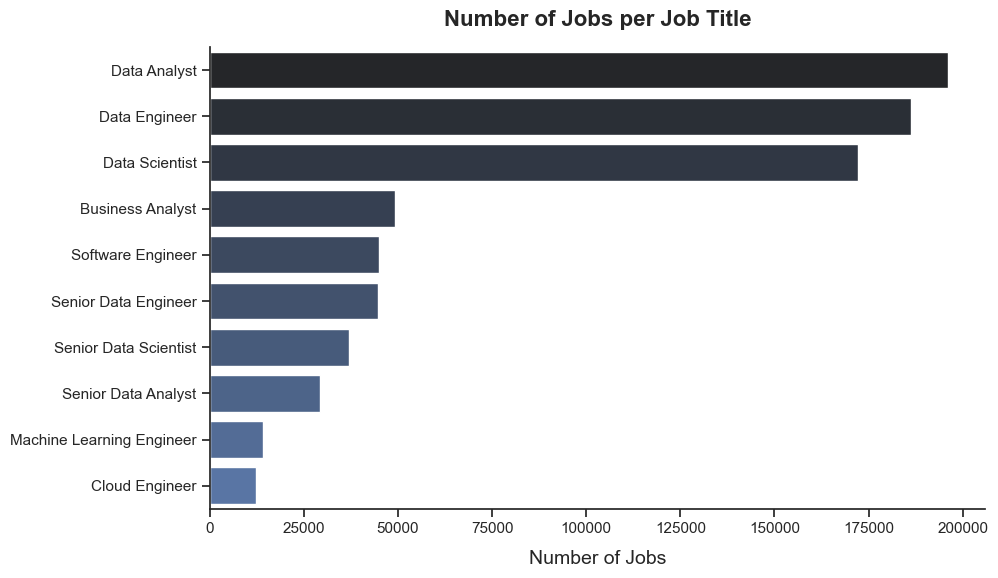

In [8]:
# Convert value_counts to DataFrame and reset index
df_plot = df['job_title_short'].value_counts().reset_index()

# Set Seaborn theme
sns.set_theme(style='ticks')

# Create horizontal bar plot with fixed hue usage
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_plot, x='count', y='job_title_short', hue='job_title_short', palette='dark:b', legend=False)

# Remove top and right spines
sns.despine()

# Add labels and title
plt.title('Number of Jobs per Job Title', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Number of Jobs', fontsize=14, labelpad=10)
plt.ylabel('') 

# Show the plot
plt.show()

#### Countries to Explore

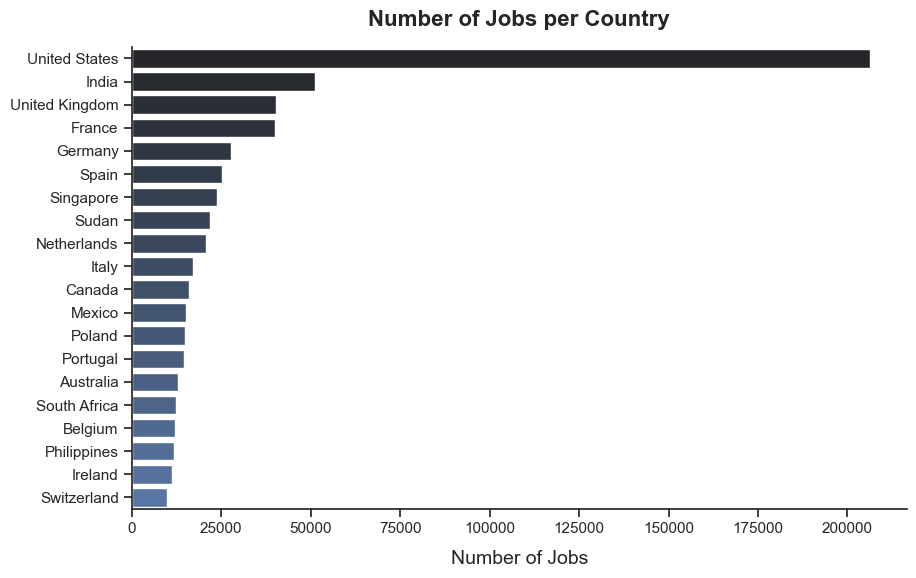

In [9]:
# Convert value_counts to DataFrame, reset index, and rename columns
df_plot = df['job_country'].value_counts().reset_index().head(20)

# Set Seaborn theme
sns.set_theme(style='ticks')

# Create a horizontal bar plot (fix: use `hue=y-variable` and `legend=False`)
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_plot, x='count', y='job_country', hue='job_country', palette='dark:b', legend=False)

# Remove top and right spines
sns.despine()

# Add labels and title
plt.title('Number of Jobs per Country', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Number of Jobs', fontsize=14, labelpad=10)
plt.ylabel('')  # Removes y-axis label for a cleaner look

# Show the plot
plt.show()


#### Companies to Explore

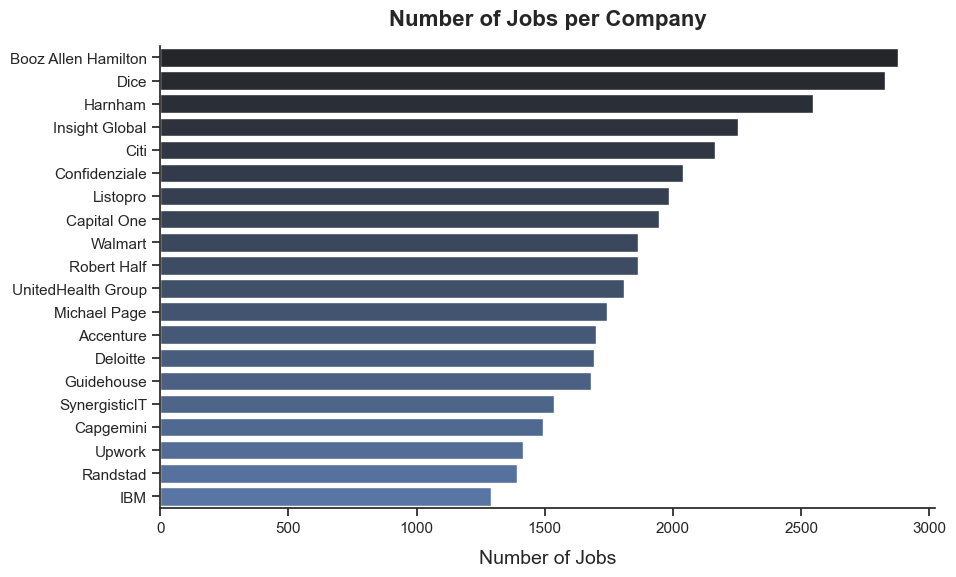

In [11]:
# Convert value_counts to DataFrame, reset index, and rename columns
df_plot = df['company_name'].value_counts().reset_index().iloc[1:21]  # Excludes the top company

# Set Seaborn theme
sns.set_theme(style='ticks')

# Create horizontal bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_plot, x='count', y='company_name', hue='company_name', palette='dark:b', legend=False)

# Remove top and right spines
sns.despine()

# Add labels and title
plt.title('Number of Jobs per Company', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Number of Jobs', fontsize=14, labelpad=10)
plt.ylabel('') 

# Show the plot
plt.show()


#### Job Opportunities

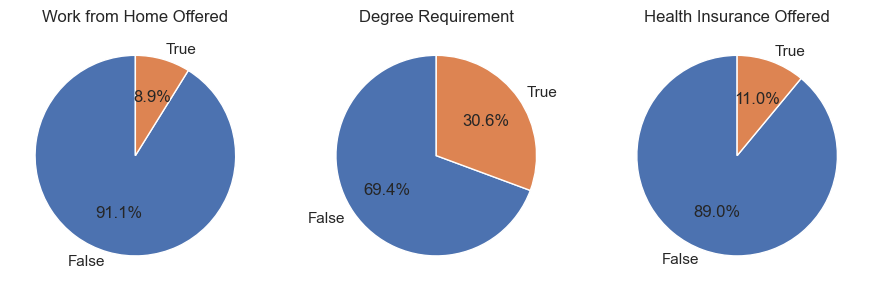

In [12]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()